# Simulation Problem 9
## Machine Learning HW3

#### Loading DataSet
|Island|code|Sex|code|Penguin|code|
|---|---|---|---|---|---|
|Biscoe|  0  |Female|  0  |Adelie|  0  |
|Dream|  1  |Male|  1  |Chinstrap|  1  |
|Torgersen|  2  |   |   |Gentoo|  2  |

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from os import chdir

chdir("/home/kassra/ML/HW_3/data")
df = pd.read_csv("penguins.csv")

df = df.replace({'FEMALE', 'MALE'}, {0.0,1.0})
df = df.replace({'Biscoe','Dream','Torgersen'},{0.0,1.0,2.0})
df = df.replace({'Adelie','Chinstrap','Gentoo'},{0.0,1.0,2.0})
df = df.fillna(value=-1)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2.0,0.0,39.1,18.7,181.0,3750.0,0.0
1,2.0,0.0,39.5,17.4,186.0,3800.0,1.0
2,2.0,0.0,40.3,18.0,195.0,3250.0,1.0
3,2.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,2.0,0.0,36.7,19.3,193.0,3450.0,1.0
...,...,...,...,...,...,...,...
339,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0
340,1.0,1.0,46.8,14.3,215.0,4850.0,1.0
341,1.0,1.0,50.4,15.7,222.0,5750.0,0.0
342,1.0,1.0,45.2,14.8,212.0,5200.0,1.0


#### Impute incomplete/corrupted data

In [55]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=-1, strategy='median')
data = df.to_numpy()
imp.fit(data)
data = imp.transform(data)

#### Visualize features

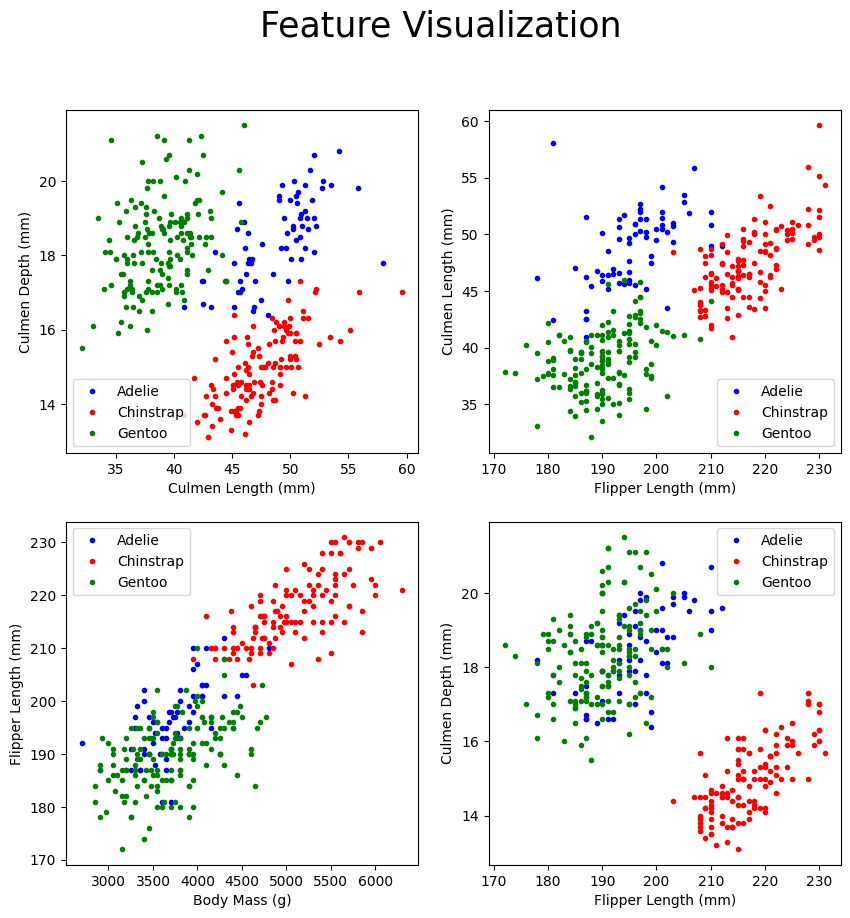

In [56]:
from matplotlib import pyplot as plt

adelie = list("")
chinstrap = list("")
gentoo = list("")

for i in range(data.shape[0]):
    if data[i, 0] == 0:
        adelie.append(data[i, 1:])
    elif data[i, 0] == 1:
        chinstrap.append(data[i,1:])
    else:
        gentoo.append(data[i, 1:])
adelie = np.array(adelie)
chinstrap = np.array(chinstrap)
gentoo = np.array(gentoo)


fig, ax = plt.subplots(2, 2)
fig.set_dpi(100)
fig.set_size_inches(10, 10)
fig.suptitle("Feature Visualization", fontsize=25)

ax[0, 0].plot(adelie[:, 1], adelie[:, 2], '.b', label="Adelie")
ax[0, 0].plot(chinstrap[:, 1], chinstrap[:, 2], '.r', label="Chinstrap")
ax[0, 0].plot(gentoo[:, 1], gentoo[:, 2], '.g', label="Gentoo")
ax[0, 0].set_xlabel('Culmen Length (mm)')
ax[0, 0].set_ylabel('Culmen Depth (mm)')
ax[0, 0].legend()

ax[0, 1].plot(adelie[:, 3], adelie[:, 1], '.b', label="Adelie")
ax[0, 1].plot(chinstrap[:, 3], chinstrap[:, 1], '.r', label="Chinstrap")
ax[0, 1].plot(gentoo[:, 3], gentoo[:, 1], '.g', label="Gentoo")
ax[0, 1].set_xlabel('Flipper Length (mm)')
ax[0, 1].set_ylabel('Culmen Length (mm)')
ax[0, 1].legend()

ax[1, 0].plot(adelie[:, 4], adelie[:, 3], '.b', label="Adelie")
ax[1, 0].plot(chinstrap[:, 4], chinstrap[:, 3], '.r', label="Chinstrap")
ax[1, 0].plot(gentoo[:, 4], gentoo[:, 3], '.g', label="Gentoo")
ax[1, 0].set_xlabel('Body Mass (g)')
ax[1, 0].set_ylabel('Flipper Length (mm)')
ax[1, 0].legend()

ax[1, 1].plot(adelie[:, 3], adelie[:, 2], '.b', label="Adelie")
ax[1, 1].plot(chinstrap[:, 3], chinstrap[:, 2], '.r', label="Chinstrap")
ax[1, 1].plot(gentoo[:, 3], gentoo[:, 2], '.g', label="Gentoo")
ax[1, 1].set_xlabel('Flipper Length (mm)')
ax[1, 1].set_ylabel('Culmen Depth (mm)')
ax[1, 1].legend()

Seperate Training Data

In [57]:
x_train, x_test, y_train, y_test = train_test_split(data[:,1:], data[:,0], test_size=0.2)

x_train_1 = x_train[:,1:3]
x_test_1 = x_test[:,1:3]

x_train_2 = np.hstack((x_train[:,3].reshape(x_train.shape[0],1), x_train[:,1].reshape(x_train.shape[0],1)))
x_test_2 = np.hstack((x_test[:,3].reshape(x_test.shape[0],1), x_test[:,1].reshape(x_test.shape[0],1)))

x_train_3 = np.hstack((x_train[:,4].reshape(x_train.shape[0],1), x_train[:,3].reshape(x_train.shape[0],1)))
x_test_3 = np.hstack((x_test[:,4].reshape(x_test.shape[0],1), x_test[:,3].reshape(x_test.shape[0],1)))

x_train_4 = np.hstack((x_train[:,3].reshape(x_train.shape[0],1), x_train[:,2].reshape(x_train.shape[0],1)))
x_test_4 = np.hstack((x_test[:,3].reshape(x_test.shape[0],1), x_test[:,2].reshape(x_test.shape[0],1)))

In [58]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from scipy.stats import multivariate_normal

def train(k,x, y, x_test, y_test):
    model = GaussianMixture(n_components=k, random_state=1).fit(x, y)
    mu = model.means_
    sigma = model.covariances_
    print("Model Trained. Accuracy on test set is: ", accuracy_score(y_test,model.predict(x_test)))
    plot(x, y, mu, sigma)


def plot(x, y, means, covariances):
    adelie = list("")
    chinstrap = list("")
    gentoo = list("")

    for i in range(x.shape[0]):
        if y[i] == 0:
            adelie.append(x[i])
        elif y[i] == 1:
            chinstrap.append(x[i])
        else:
            gentoo.append(x[i])
    adelie = np.array(adelie)
    chinstrap = np.array(chinstrap)
    gentoo = np.array(gentoo)

    plt.plot(adelie[:,0], adelie[:,1],'.b', label="Adelie")
    plt.plot(chinstrap[:,0], chinstrap[:,1],'.r', label="Chinstrap")
    plt.plot(gentoo[:,0], gentoo[:,1],'.g', label="gentoo")
    plt.legend()

    for i in range(means.shape[0]):
        deltaX = (max(x[:,0]) - min(x[:,0]))/10
        deltaY = (max(x[:,1]) - min(x[:,1]))/10
        xmin = min(x[:,0]) - deltaX
        xmax = max(x[:,0]) + deltaX
        ymin = min(x[:,1]) - deltaY
        ymax = max(x[:,1]) + deltaY
        xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

        target = multivariate_normal(mean=means[i], cov=covariances[i])
        xy = target.rvs()
        xy2 = target.rvs() 
        zz = target.pdf(np.dstack((xx, yy)))
        plt.contour(xx,yy, zz, levels=np.sort([target.pdf(xy), target.pdf(xy2)]))
    plt.title("Actual Data and GMM Contours")
    plt.show()

Model Trained. Accuracy on test set is:  0.5652173913043478


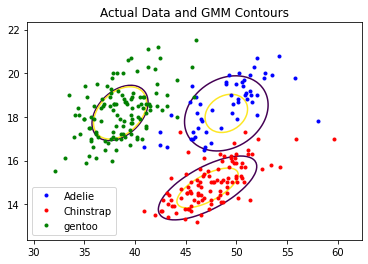

Model Trained. Accuracy on test set is:  0.855072463768116


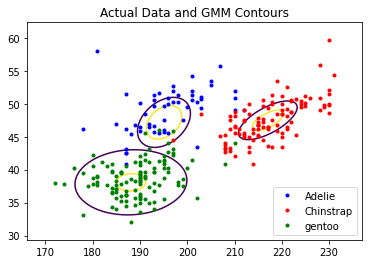

Model Trained. Accuracy on test set is:  0.6231884057971014


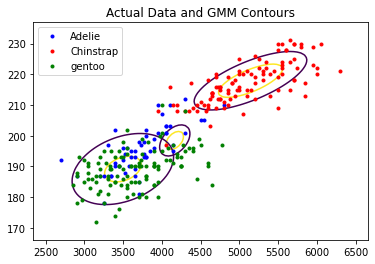

Model Trained. Accuracy on test set is:  0.6231884057971014


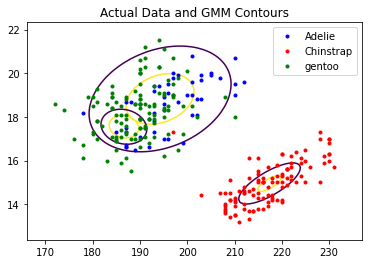

In [59]:
train(3, x_train_1,y_train, x_test_1, y_test)
train(3, x_train_2,y_train, x_test_2, y_test)
train(3, x_train_3,y_train, x_test_3, y_test)
train(3, x_train_4,y_train, x_test_4, y_test)